In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install tensorflow

In [3]:
data=pd.read_csv('Tweets.csv')
data.head(7)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


In [4]:
shape=data.shape
print(shape)

(14640, 15)


In [5]:
cols=data.columns.to_list()
print(cols)

['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']


In [6]:
data.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


Dropping columns(text and airlinesentiment) row

In [7]:
df=data.dropna(subset=['text', 'airline_sentiment'])

In [8]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
drop_the_cols=["tweet_location", "user_timezone",
                "negativereason", "negativereason_confidence"]

In [10]:
df = df.drop(columns=drop_the_cols, errors="ignore")


In [11]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created
0,570306133677760513,neutral,1.0000,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800
1,570301130888122368,positive,0.3486,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800
2,570301083672813571,neutral,0.6837,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800
3,570301031407624196,negative,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800
4,570300817074462722,negative,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800


In [12]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created
0,570306133677760513,neutral,1.0000,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800
1,570301130888122368,positive,0.3486,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800
2,570301083672813571,neutral,0.6837,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800
3,570301031407624196,negative,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800
4,570300817074462722,negative,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800


In [13]:
df.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0
text,0
tweet_coord,13621


In [14]:
col=["airline_sentiment_gold","negativereason_gold","tweet_coord"]
df=df.drop(columns=col, errors='ignore')

In [15]:
df.head(50)

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,570301130888122368,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,570301031407624196,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800
5,570300767074181121,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800
6,570300616901320704,positive,0.6745,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800
7,570300248553349120,neutral,0.6340,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29 -0800
8,570299953286942721,positive,0.6559,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19 -0800
9,570295459631263746,positive,1.0000,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24 10:53:27 -0800


In [16]:
df.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
airline,0
name,0
retweet_count,0
text,0
tweet_created,0


Tweet Length Distributions + Label Proportions

In [17]:
df["char_length"]=df["text"].astype(str).apply(len)

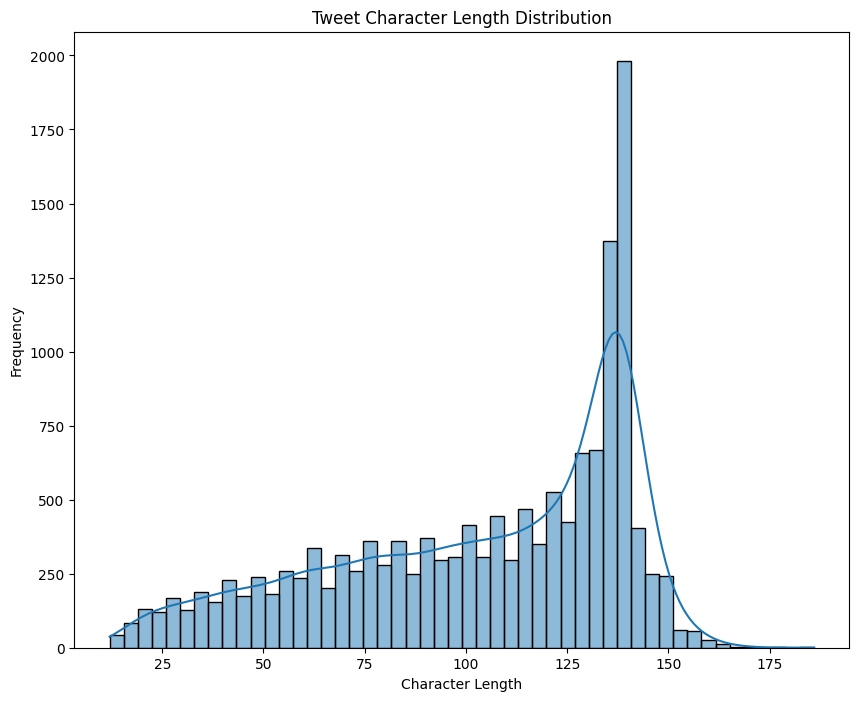

In [18]:
plt.figure(figsize=(10,8))
sea.histplot(df["char_length"], bins=50, kde=True)
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.title("Tweet Character Length Distribution")
plt.show()

In [19]:
df["Word_character"]=df["text"].astype(str).apply(lambda x: len(x.split()))

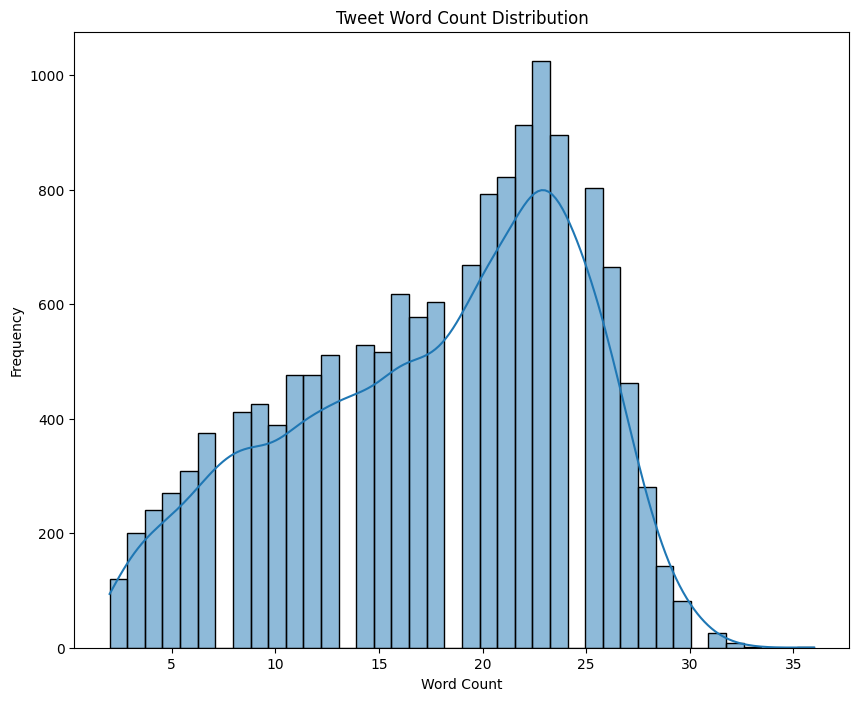

In [20]:
plt.figure(figsize=(10,8))
sea.histplot(df["Word_character"], bins=40, kde=True)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Tweet Word Count Distribution")
plt.show()

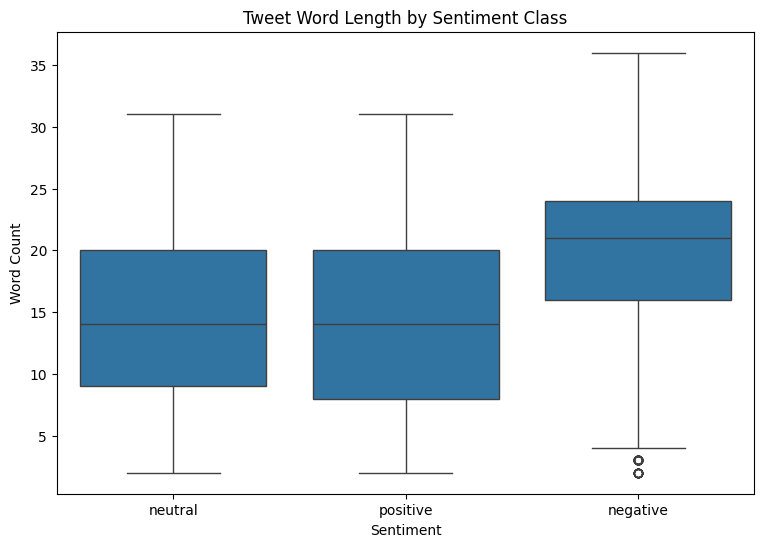

In [21]:
plt.figure(figsize=(9,6))
sea.boxplot(x="airline_sentiment", y="Word_character", data=df)
plt.title("Tweet Word Length by Sentiment Class")
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.show()

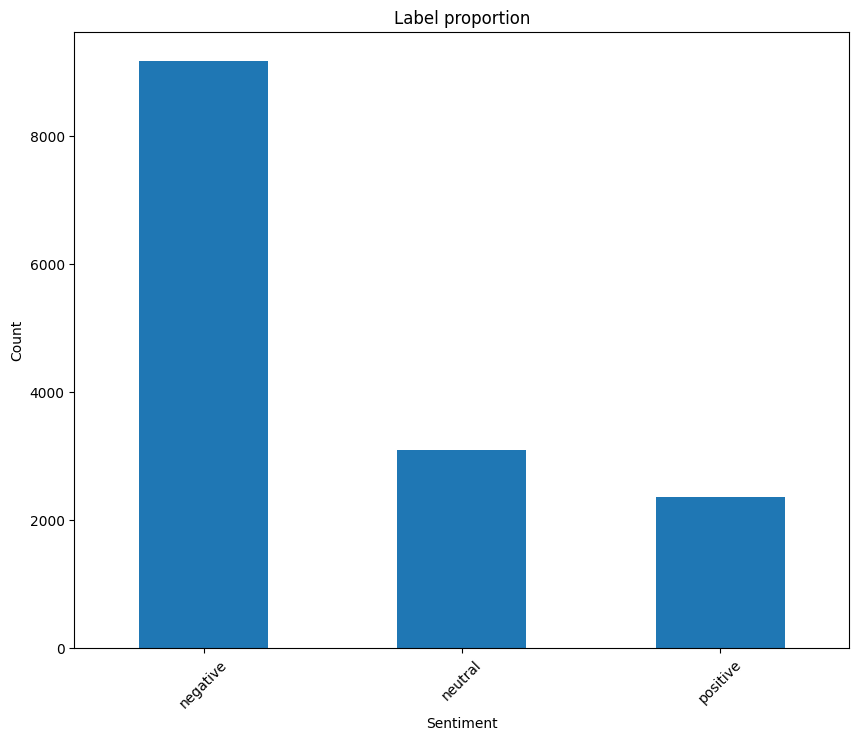

In [22]:
plt.figure(figsize=(10,8))
df["airline_sentiment"].value_counts().plot(kind="bar")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Label proportion")
plt.xticks(rotation=45)
plt.show()

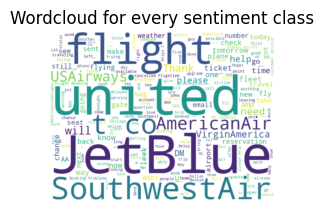

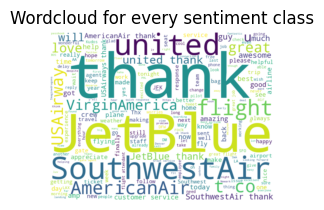

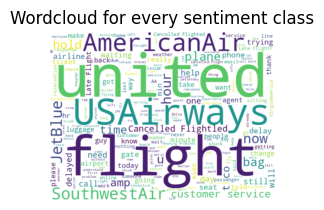

In [23]:
from wordcloud import WordCloud, STOPWORDS

sentiments=df["airline_sentiment"].unique()

for i, sentiment in enumerate(sentiments, 1):
  text=" ".join(df[df["airline_sentiment"]==sentiment]['text'].astype(str))

  wordcloud=WordCloud(width=800,
                      height=600,
                      stopwords=STOPWORDS,
                      background_color="white").generate(text)
  plt.subplot(2,2,i)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title("Wordcloud for every sentiment class")
  plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


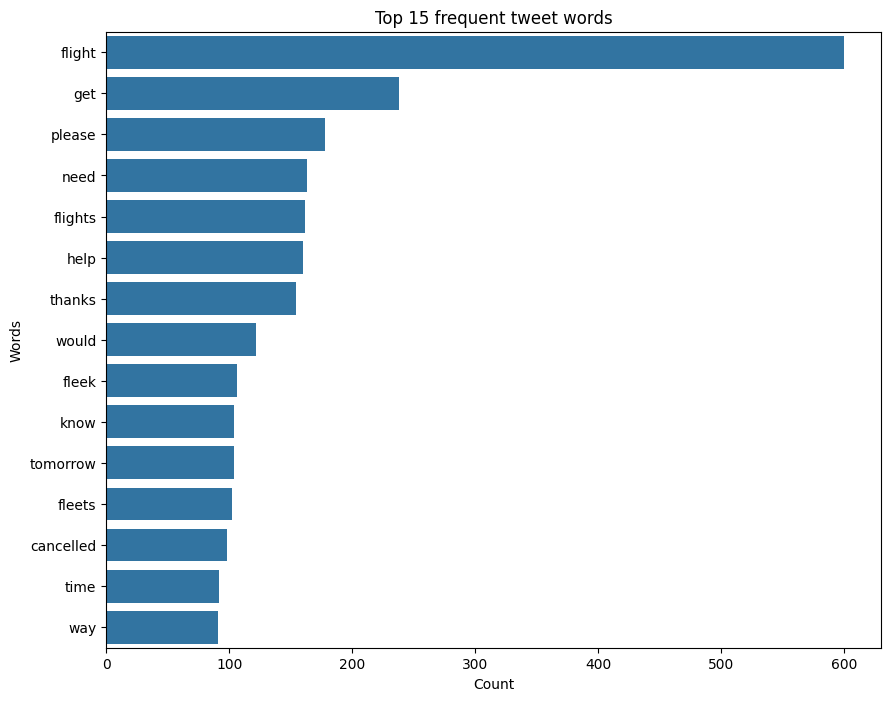

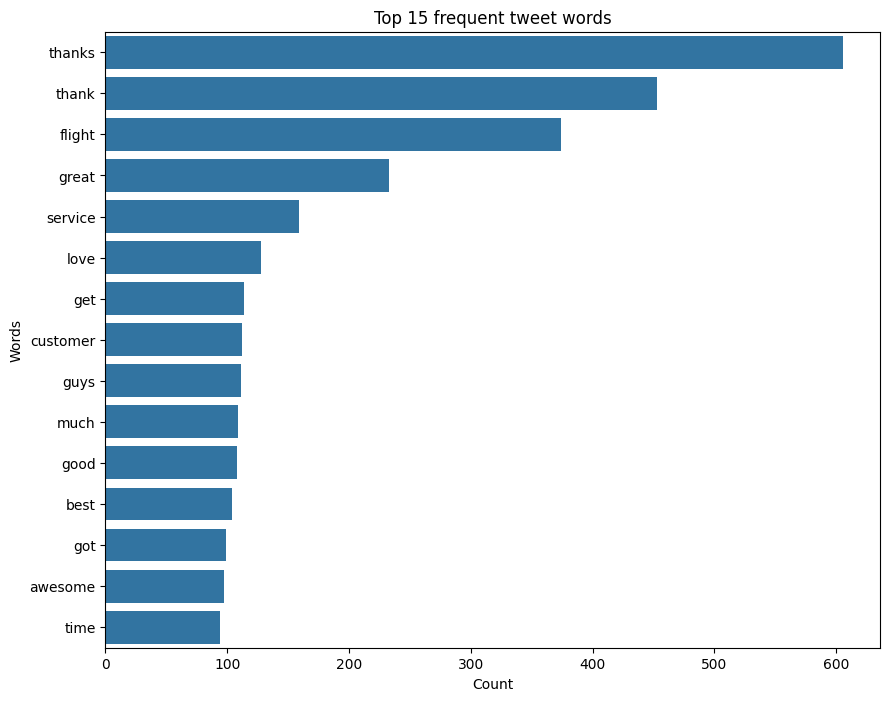

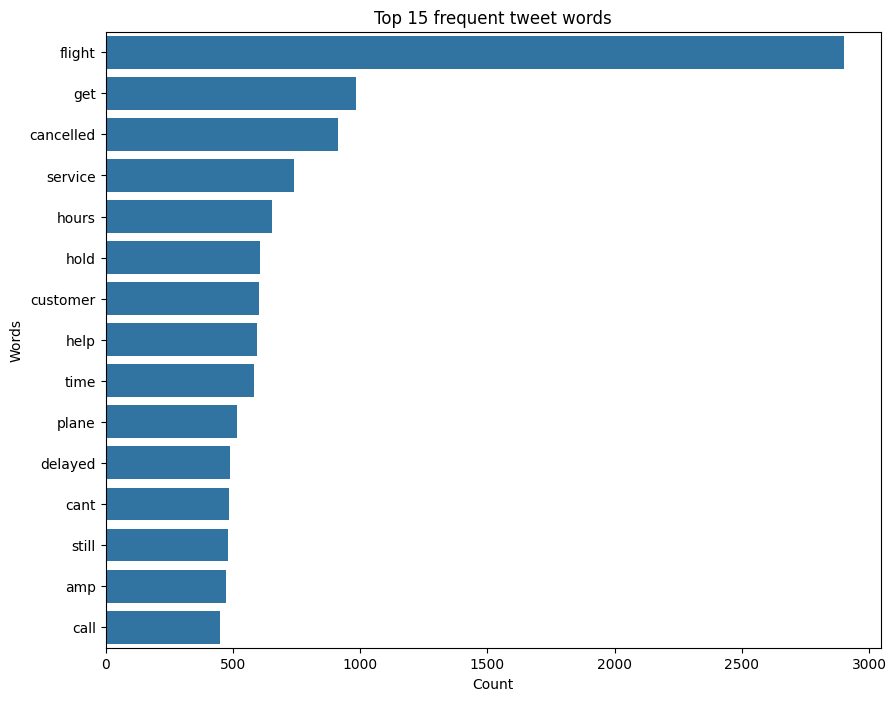

In [24]:
from collections import Counter
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))

def preprocessing_wrd(text):
  text=text.lower()
  text=re.sub(r"http\S+|www\S+|https\S+", "", text)
  text=re.sub(r"@\w+|#\w+", "", text)
  text=re.sub(r"[^a-zA-Z\s]", "", text)

  tokens=text.split()
  tokens=[t for t in tokens if t not in stop_words and len(t)>2]
  return tokens

def words_apply(df, sentiment, n=15):
  all_words=df[df["airline_sentiment"]==sentiment]['text'].astype(str).apply(preprocessing_wrd)
  flatwords=[word for sublist in all_words for word in sublist]

  word_count=Counter(flatwords).most_common(n)
  word, count=zip(*word_count)

  plt.figure(figsize=(10,8))
  sea.barplot(x=list(count), y=list(word),orient="h")
  plt.title(f"Top {n} frequent tweet words")
  plt.xlabel("Count")
  plt.ylabel("Words")
  plt.show()

for sentiment in sentiments:
  words_apply(df, sentiment)

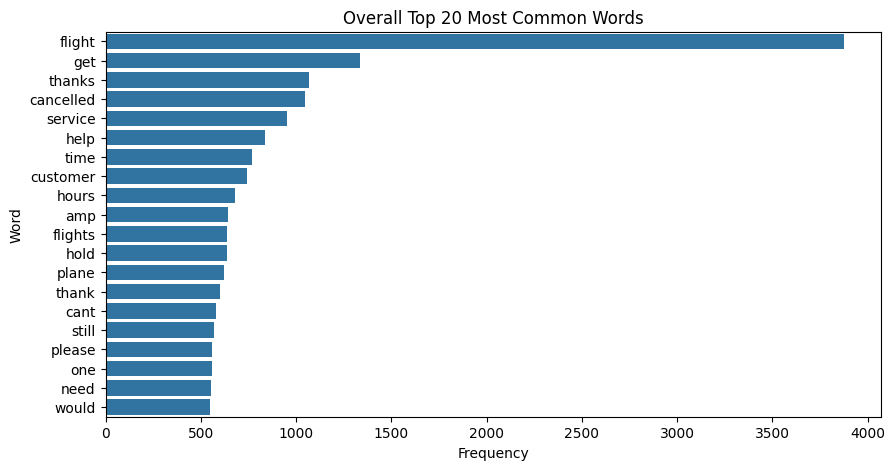

In [25]:
from itertools import chain

df['cleaned_text'] = df['text'].apply(preprocessing_wrd)

# all_words = list(chain.from_iterable(df['cleaned_text']))
all_words=[word for wordlist in df["cleaned_text"] for word in wordlist]
word_counts = Counter(all_words).most_common(20)

words, counts = zip(*word_counts)

plt.figure(figsize=(10, 5))
sea.barplot(x=list(counts), y=list(words), orient='h')
plt.title("Overall Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


In [26]:
from nltk.stem import PorterStemmer

stop_words=set(stopwords.words('english'))
stemmer=PorterStemmer()

def preprocee_words(text):
  text=text.lower()
  text=re.sub(r"[^a-zA-Z\s]", "", text)
  tokens=text.split()
  tokens=[stemmer.stem(word) for word in tokens if word not in stop_words]
  return " ".join(tokens)

df['clean_text']=df['text'].astype(str).apply(preprocee_words)
print(df['clean_text'])


0                              virginamerica dhepburn said
1          virginamerica plu youv ad commerci experi tacki
2        virginamerica didnt today must mean need take ...
3        virginamerica realli aggress blast obnoxi ente...
4                       virginamerica realli big bad thing
                               ...                        
14635          americanair thank got differ flight chicago
14636    americanair leav minut late flight warn commun...
14637    americanair pleas bring american airlin blackb...
14638    americanair money chang flight dont answer pho...
14639    americanair ppl need know mani seat next fligh...
Name: clean_text, Length: 14640, dtype: object


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

Bag_of_words=CountVectorizer(max_features=20000)
x_BoW=Bag_of_words.fit_transform(df['clean_text'])
print(x_BoW)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 142030 stored elements and shape (14640, 11712)>
  Coords	Values
  (0, 11091)	1
  (0, 2447)	1
  (0, 9102)	1
  (1, 11091)	1
  (1, 8267)	1
  (1, 11667)	1
  (1, 96)	1
  (1, 1806)	1
  (1, 3087)	1
  (1, 10126)	1
  (2, 11091)	1
  (2, 2462)	1
  (2, 10486)	1
  (2, 7261)	1
  (2, 6888)	1
  (2, 7347)	1
  (2, 10136)	1
  (2, 435)	1
  (2, 10626)	1
  (3, 11091)	1
  (3, 8668)	1
  (3, 171)	1
  (3, 982)	1
  (3, 7668)	1
  (3, 2923)	1
  :	:
  (14637, 338)	1
  (14637, 970)	1
  (14638, 3353)	1
  (14638, 6744)	1
  (14638, 2634)	1
  (14638, 439)	1
  (14638, 8146)	1
  (14638, 1502)	1
  (14638, 7146)	1
  (14638, 339)	1
  (14638, 1808)	1
  (14638, 9983)	1
  (14639, 7347)	1
  (14639, 3353)	2
  (14639, 9248)	1
  (14639, 6249)	1
  (14639, 7420)	2
  (14639, 8271)	1
  (14639, 10946)	1
  (14639, 8081)	1
  (14639, 6775)	1
  (14639, 8550)	1
  (14639, 9814)	1
  (14639, 339)	1
  (14639, 8350)	1


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tdidf=TfidfVectorizer(max_features=20000)
x_tdidf=tdidf.fit_transform(df['clean_text'])
print(x_tdidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 142030 stored elements and shape (14640, 11712)>
  Coords	Values
  (0, 11091)	0.35938972311895606
  (0, 2447)	0.8182784677390936
  (0, 9102)	0.44861941125082966
  (1, 11091)	0.23799549729181702
  (1, 8267)	0.3556856952124638
  (1, 11667)	0.35754160686394476
  (1, 96)	0.3679014993974375
  (1, 1806)	0.4215961637653713
  (1, 3087)	0.2868441828500708
  (1, 10126)	0.541881356992202
  (2, 11091)	0.2787169547422912
  (2, 2462)	0.33592373821881344
  (2, 10486)	0.2930229049846578
  (2, 7261)	0.4492936849933902
  (2, 6888)	0.38641176702084173
  (2, 7347)	0.2626187755786623
  (2, 10136)	0.3000896463367755
  (2, 435)	0.3208326225793204
  (2, 10626)	0.33237752705535534
  (3, 11091)	0.17667282853821395
  (3, 8668)	0.19931631311525785
  (3, 171)	0.37408996999874433
  (3, 982)	0.3513479675540348
  (3, 7668)	0.3857809668148536
  (3, 2923)	0.28833385876001283
  :	:
  (14637, 338)	0.41758544620874355
  (14637, 970)	0.6643126694255252
  (14638,

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [30]:
y=df['airline_sentiment']

x_train, x_test, y_train, y_test=train_test_split(x_tdidf, y, test_size=0.2, random_state=27, stratify=y)

Logistic regression

In [31]:
logistic_reg=LogisticRegression(max_iter=500, class_weight='balanced')
logistic_reg.fit(x_train, y_train)

y_pred_lr=logistic_reg.predict(x_test)
print("\tLOGISTIC REGRESSION")
clasa_rep=classification_report(y_test, y_pred_lr)
acc_lr=accuracy_score(y_test, y_pred_lr)
print("Confusion Matrix:\n", clasa_rep)
print("Accuracy Score:", acc_lr)


	LOGISTIC REGRESSION
Confusion Matrix:
               precision    recall  f1-score   support

    negative       0.90      0.80      0.84      1835
     neutral       0.54      0.68      0.60       620
    positive       0.65      0.71      0.68       473

    accuracy                           0.76      2928
   macro avg       0.69      0.73      0.71      2928
weighted avg       0.78      0.76      0.77      2928

Accuracy Score: 0.757172131147541


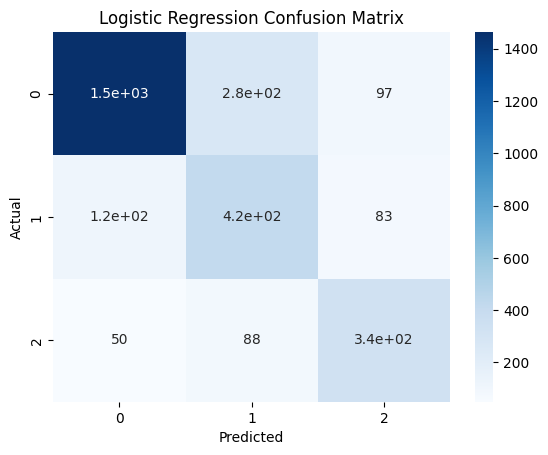

In [32]:
conf_mat_lr=confusion_matrix(y_test, y_pred_lr)
sea.heatmap(conf_mat_lr, cmap='Blues', annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [33]:
# from sklearn.model_selection import GridSearchCV

# parameters={
#     'criterion':['gini', 'entropy'],
#     'max_depth':[20,40,60,80, 100],
#     'min_samples_split':[2,5,10,15,20],
#     'min_samples_leaf':[1,2,5,10],
#     'max_features':['auto', 'sqrt', 'log2']
# }

# grid=GridSearchCV(
#     estimator=DecisionTreeClassifier(),
#     param_grid=parameters,
#     cv=5,
#     n_jobs=-1,
#     scoring='f1_weighted'
# )

# grid.fit(x_train, y_train)

# print(grid.best_params_)
# print(grid.best_score_)

	DECISION TREE
Confusion Matrix:
               precision    recall  f1-score   support

    negative       0.72      0.93      0.81      1835
     neutral       0.49      0.19      0.27       620
    positive       0.68      0.47      0.55       473

    accuracy                           0.70      2928
   macro avg       0.63      0.53      0.54      2928
weighted avg       0.66      0.70      0.65      2928

Accuracy Score: 0.6950136612021858


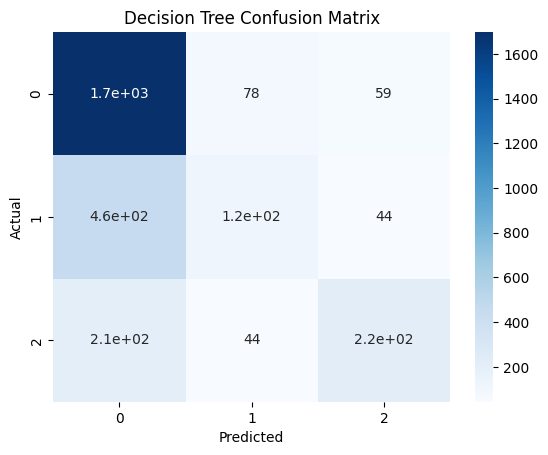

In [34]:
des_tree=DecisionTreeClassifier(criterion='entropy',
                                max_depth=100,
                                max_features='sqrt',
                                min_samples_leaf=2,
                                min_samples_split=15
                                )
des_tree.fit(x_train, y_train)

y_pred_dt=des_tree.predict(x_test)
print("\tDECISION TREE")
acc_dt=accuracy_score(y_test, y_pred_dt)
clas_rep_dt=classification_report(y_test, y_pred_dt)
print("Confusion Matrix:\n", clas_rep_dt)
print("Accuracy Score:", acc_dt)

conf_mat_dt=confusion_matrix(y_test, y_pred_dt)
sea.heatmap(conf_mat_dt, cmap='Blues',annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

LSTM

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)


2.19.0


In [36]:
tokenizer=Tokenizer(num_words=20000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])


In [37]:
X_Seq = tokenizer.texts_to_sequences(df['text'])
X_pad=pad_sequences(X_Seq, maxlen=50, padding='post')

In [38]:
y=pd.factorize(df['airline_sentiment'])[0]

In [39]:
print(y)

[0 1 0 ... 0 2 0]


In [40]:
x_train, x_test, y_train, y_test=train_test_split(X_pad, y, test_size=0.2, random_state=27, stratify=y)

In [41]:
model=Sequential()
model.add(Embedding(input_dim=20000, output_dim=128, input_length=50))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
history=model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=8,
    batch_size=32,

)

Epoch 1/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.6344 - loss: 0.8771 - val_accuracy: 0.7384 - val_loss: 0.6212
Epoch 2/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7625 - loss: 0.5520 - val_accuracy: 0.7452 - val_loss: 0.5852
Epoch 3/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8453 - loss: 0.4208 - val_accuracy: 0.7862 - val_loss: 0.6125
Epoch 4/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8975 - loss: 0.3122 - val_accuracy: 0.7443 - val_loss: 0.6839
Epoch 5/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8987 - loss: 0.3135 - val_accuracy: 0.7866 - val_loss: 0.6994
Epoch 6/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9482 - loss: 0.1814 - val_accuracy: 0.7764 - val_loss: 0.7433
Epoch 7/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9599 - loss: 0.1461 - val_accuracy: 0.7559 - val_loss: 0.7686
Epoch 8/8
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9701 - loss: 0.1175 - val_accuracy: 0.7576 -

In [43]:
y_pred_Lstm=np.argmax(model.predict(x_test), axis=1)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


	LSTM
Confusion Matrix:
               precision    recall  f1-score   support

           0       0.53      0.62      0.57       620
           1       0.77      0.58      0.66       473
           2       0.85      0.85      0.85      1835

    accuracy                           0.76      2928
   macro avg       0.71      0.68      0.69      2928
weighted avg       0.77      0.76      0.76      2928

Accuracy Score: 0.757172131147541
	Confusion matrix LSTM


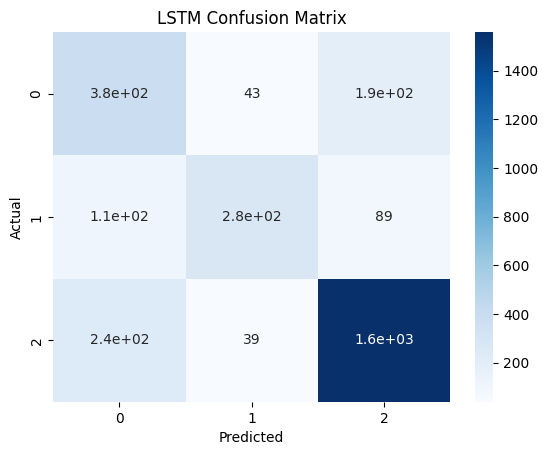

In [44]:
print("\tLSTM")
acc_lstm=accuracy_score(y_test, y_pred_Lstm)
clas_rep_lstm=classification_report(y_test, y_pred_Lstm)
print("Confusion Matrix:\n", clas_rep_lstm)
print("Accuracy Score:", acc_lstm)

con_lstm=confusion_matrix(y_test, y_pred_Lstm)
print("\tConfusion matrix LSTM")
sea.heatmap(con_lstm, cmap='Blues', annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LSTM Confusion Matrix")
plt.show()

In [45]:
!pip install transformers torch


In [46]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW

In [47]:
x=df['text'].astype(str)
y=df['airline_sentiment']

label2id={label: i for i, label in enumerate(y.unique())}
id2label={value: key for key, value in label2id.items()}

In [48]:
print(label2id)

{'neutral': 0, 'positive': 1, 'negative': 2}


In [49]:
print(id2label)

{0: 'neutral', 1: 'positive', 2: 'negative'}


In [50]:
y=y.map(label2id)

In [51]:
print(y)

0        0
1        1
2        0
3        2
4        2
        ..
14635    1
14636    2
14637    0
14638    2
14639    0
Name: airline_sentiment, Length: 14640, dtype: int64


In [52]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=27, stratify=y)

In [53]:
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [87]:
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=64):
        self.texts = list(texts)
        self.labels = list(labels)
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long),
            'index': idx
        }
x_test_list = list(x_test)
y_test_list = list(y_test)

train_dataset = TweetDataset(x_train, y_train, tokenizer)
test_dataset  = TweetDataset(x_test, y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [90]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=3
).to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [91]:
epochs = 3

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss = {round(total_loss/len(train_loader),4)}")


Epoch 1/3, Loss = 0.4851
Epoch 2/3, Loss = 0.302
Epoch 3/3, Loss = 0.1842


In [92]:
model.eval()
y_pred, y_true, indexes = [], [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()

        y_pred.extend(preds)
        y_true.extend(batch['labels'].numpy())
        indexes.extend(batch['index'].numpy())


Accuracy: 0.842896174863388
              precision    recall  f1-score   support

     neutral       0.69      0.70      0.69       620
    positive       0.80      0.80      0.80       473
    negative       0.91      0.90      0.90      1835

    accuracy                           0.84      2928
   macro avg       0.80      0.80      0.80      2928
weighted avg       0.84      0.84      0.84      2928



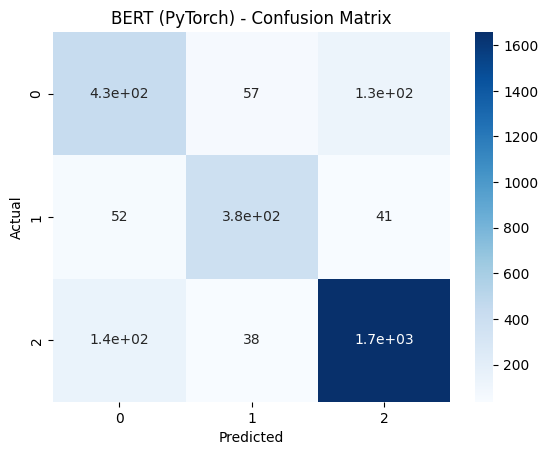

In [93]:
acc_bert=accuracy_score(y_true, y_pred)
print("Accuracy:", acc_bert)

print(classification_report(y_true, y_pred, target_names=label2id.keys()))

cm_bert = confusion_matrix(y_true, y_pred)
sea.heatmap(cm_bert, annot=True, cmap='Blues')
plt.title("BERT (PyTorch) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [94]:
acc=acc_bert
match acc:
  case acc if acc_lstm>acc:
    print("The best accuracy achieved is from LSTM: ", acc_lstm)
  case acc if acc_dt> acc_bert:
    print("The best accuracy achieved is from Decision Tree: ", acc_dt)
  case acc if acc_lr>acc:
      print("The best accuracy achieved is from Logistic Regression: ", acc_lr)
  case _:
    print("The best accuracy achieved is from BERT: ", acc_bert)

The best accuracy achieved is from BERT:  0.842896174863388


According to all these weighted f1 values we can say the BERT has the best F1 which is 0.84 also the accuracy is better with the BERT is the best performing model for this sentiment classification task. While the simpler ML models like Decision tree and Logistic regression are good and faster, these black box models LSTM and BERT performed better with their explainability.

Per class insights:
1. Negative tweets: The bert model and lstm can caputre the negative tweets better than the simpler models which might be wrong in some cases.
2. Neutral: All models performed better but the BERT still has some edge over others here
3. Positive tweets: With high f1 and recall the BERT scored here as well.

This explains that the trade off between interpretablity and performance. Black box models can be slower but their explainability can be better at performance.

In [99]:
indexes=np.array(indexes)
y_true=np.array(y_true)
y_pred=np.array(y_pred)

order = np.argsort(indexes)

y_true_ordered=y_true[order]
y_pred_ordered=y_pred[order]

In [100]:
error_df=pd.DataFrame({
    'x_test_texts': [x_test_list[i] for i in order],
    'y_test': y_true_ordered,
    'y_pred_dt': y_pred_ordered,
})

In [101]:
misplacced_tweets=error_df[error_df['y_test']!=error_df['y_pred_dt']]
misplaced_tweets=misplacced_tweets.sample(15, random_state=27)

In [105]:
misplaced_tweets

,x_test_texts,y_test,y_pred_dt
2876,@SouthwestAir @Kaneshow @InternJohnRadio @mrer...,2,1
883,@JetBlue why don't you fly to #nashville? :(,0,2
2632,@JetBlue my mom wanted me to change her seat a...,0,2
2339,"@USAirways I understand that, and when I'm att...",0,2
2475,@USAirways but i bougth mc caren to jfk with s...,0,2
2389,@united @perfectomobile You really shouldn't u...,0,2
2148,Jet BOOOO 🍅🍅🍅🍅 RT @JetBlue: Our fleet's on fle...,2,0
231,@SouthwestAir allows you to change a flight on...,1,0
2111,@SouthwestAir pleaseeee resume direct flights ...,2,0
156,@JetBlue Thanks for the THIRD gate change http...,2,1
